In [ ]:
import sys
sys.path.append('../../source/maskrcnn')
sys.path.append('../../source/dataset')
sys.path.append('../../source')
import utils
import model as modellib
import visualize
import config

import mark_dataset
import alignment
import time

import sc_utils 
mmc = sc_utils.get_mmc()

In [3]:
model = alignment.get_inference_model()

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Loading weights from  /home/cellcounter/Downloads/Smart_Scope/python/notebook/adjusted_frame_alignment_20.h5


In [9]:
start = time.time()
center, img, frame, r = alignment.find_alignment_mark(model)
end = time.time()
print ('Total time:', end-start)

(2200, 2688)
Processing 1 images
image                    shape: (2200, 2688, 3)       min:   16.00000  max:   64.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -39.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2688.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
ran detect
Total time: 9.661192655563354


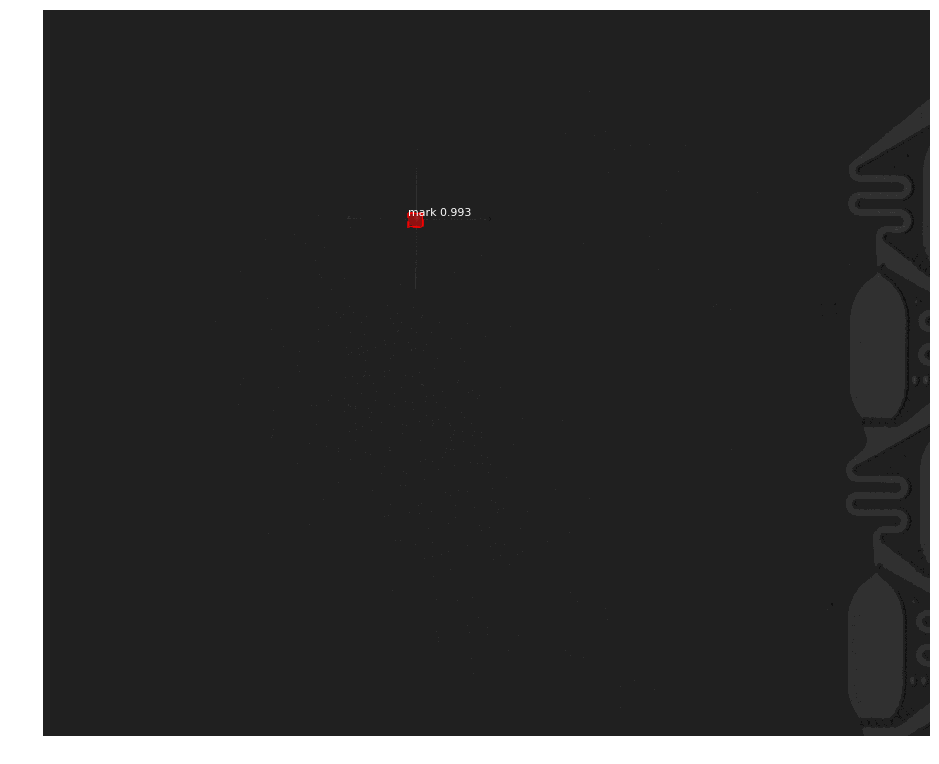

In [10]:
# center
visualize.display_instances(frame, r['rois'], r['masks'], r['class_ids'], 
                            ['BG', 'mark'], r['scores'])

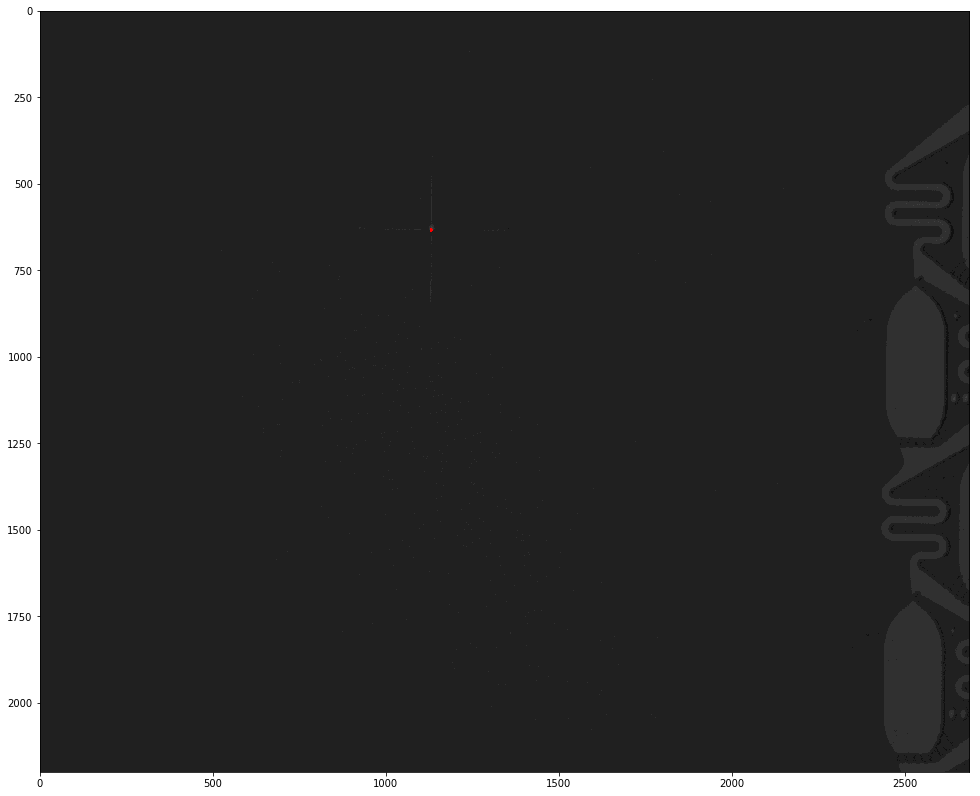

In [11]:
from skimage import draw
import matplotlib.pyplot as plt
def visualize_marker_centers(img, center, color=0):
    res = img.copy()
    rr, cc = draw.circle(center[1], center[0], radius=5, shape=img.shape)
    res[rr, cc] = color
    return res
    
plt.imshow(visualize_marker_centers(frame, center, [255, 0, 0]))
plt.gcf().set_size_inches(20, 14)

In [12]:
center

array([1130. ,  634.5])

In [13]:
alignment.move_to_center(mmc, center)

In [14]:
start = time.time()
center, img, frame, r = alignment.find_alignment_mark(model)
end = time.time()
print ('Total time:', end-start)
center

(2200, 2688)
Processing 1 images
image                    shape: (2200, 2688, 3)       min:   16.00000  max:   64.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -39.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2688.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
ran detect
Total time: 9.661292791366577


array([1337.5, 1097.5])

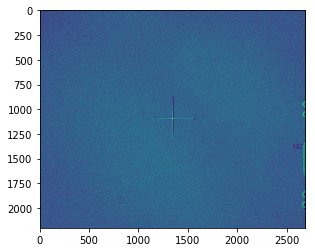

In [17]:
plt.imshow(img)